C:\Users\kalic\AppData\Local\Temp\ipykernel_4572\3364817085.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sale Quantity", y="Item", data=top_items, palette="viridis")


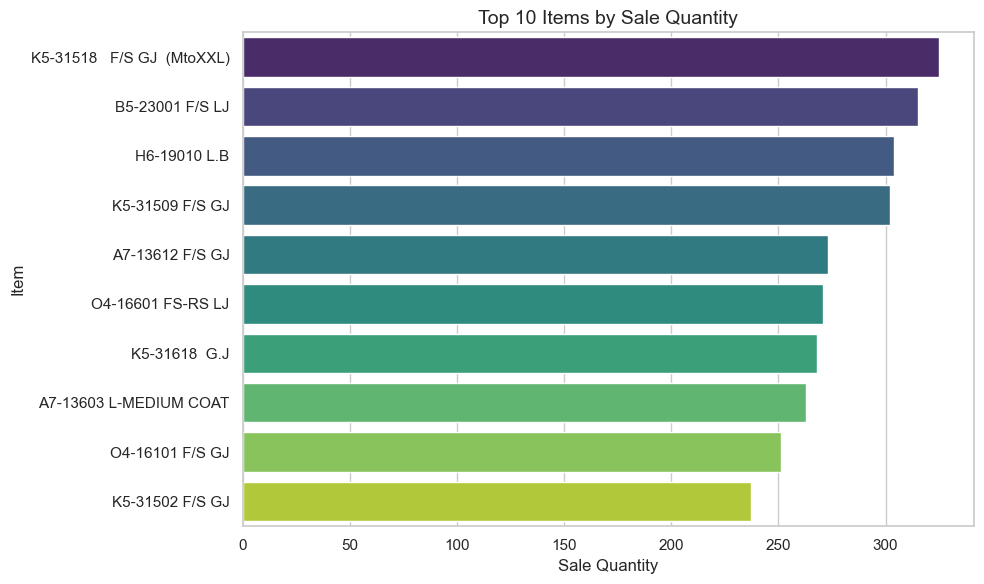

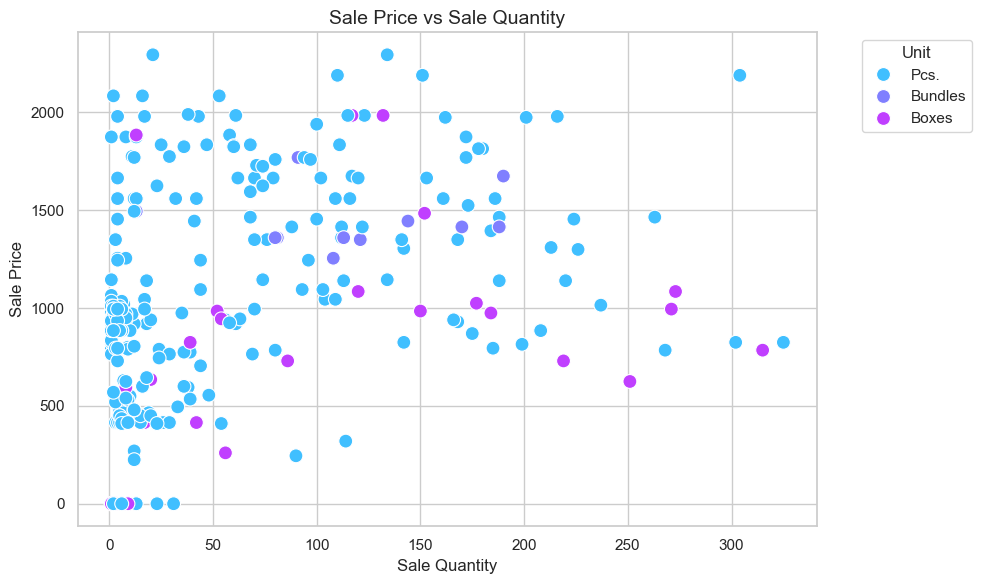

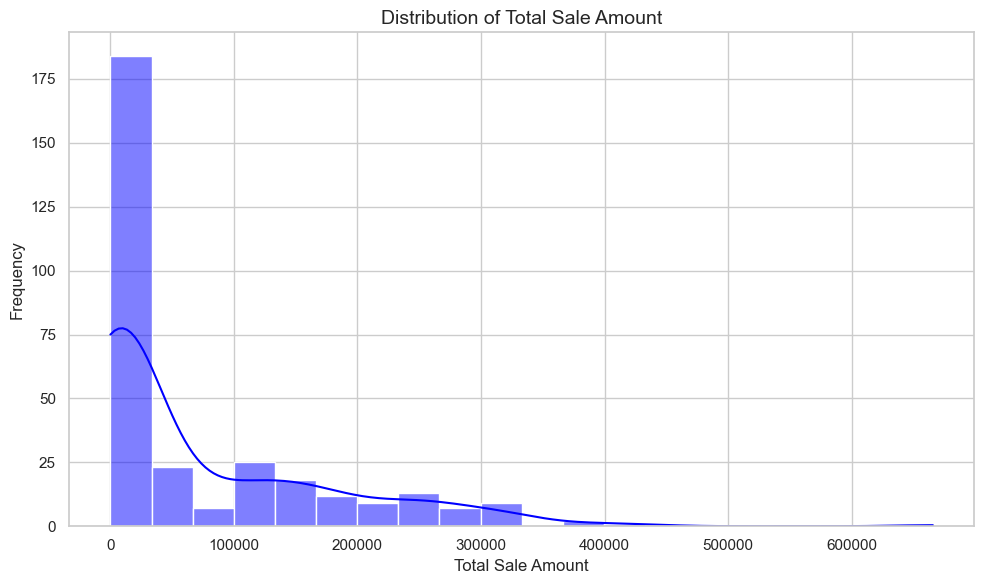

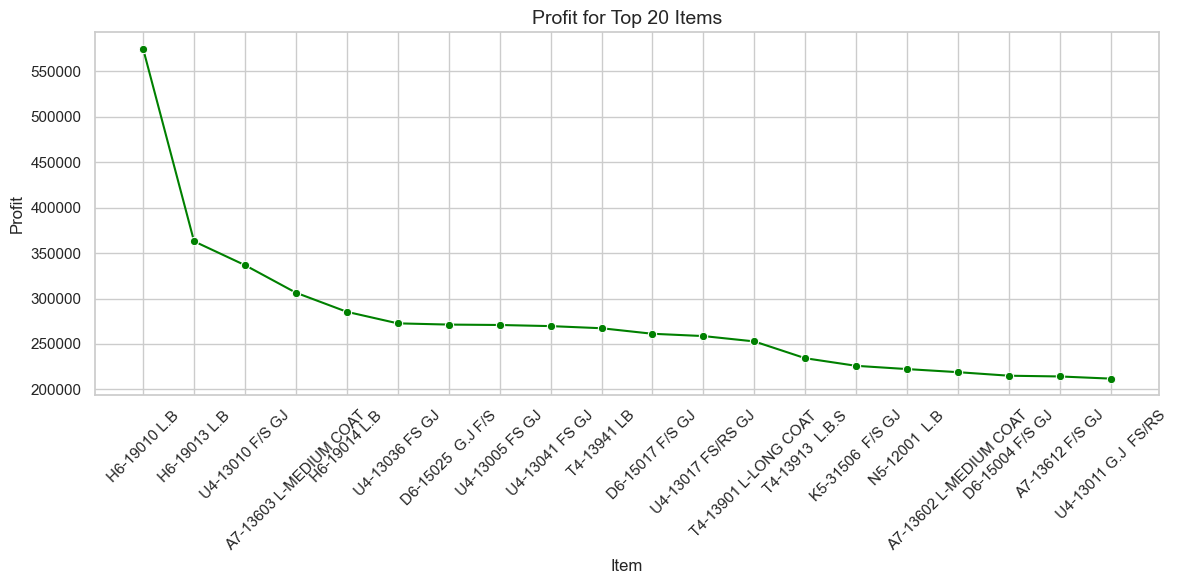

C:\Users\kalic\AppData\Local\Temp\ipykernel_4572\3364817085.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Unit", y="Sale Price", data=data, palette="Set2")


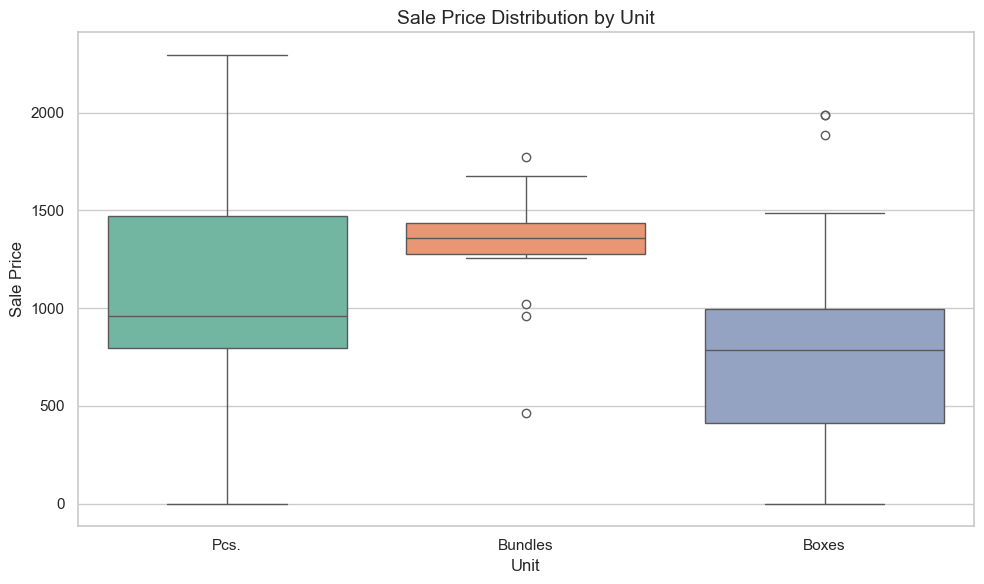

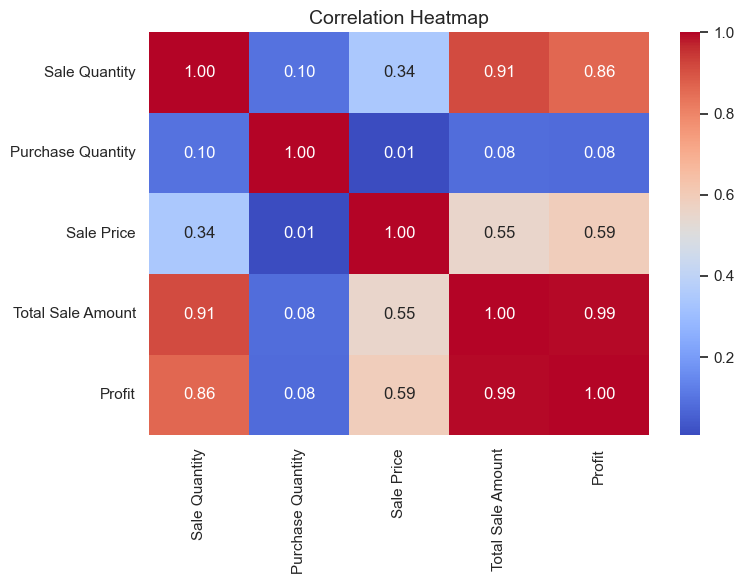

Random Forest Regression Results:
Mean Absolute Error (MAE): 5.840793650793651
Root Mean Squared Error (RMSE): 11.000579710554074
R-Squared (R²): 0.9648872574857531

Predicted Future Sales Quantities:
                        Item  Purchase Quantity  Sale Price  \
0        J7-22018 ROUND NECK                  9   78.648291   
1          A7-13618 FS-RS GJ                 17   91.482075   
2                LADIES COTY                 19   16.740208   
3         3695Short Top Girl                  7   29.582709   
4              V6-17014  F/S                  4   56.733078   
5            U4-13002 F/S GJ                  7   60.242748   
6  G2-24004 LJ SHORT WASHING                  5   37.084018   
7     T4-13938  L.B (MtoXXL)                  4   32.404331   
8  K5-31518  F/S GJ (3to5XL)                 13   70.074993   
9    TG-3633 SHOT FANCY COTY                 10   40.984154   

   Total Sale Amount      Profit  Predicted Sale Quantity  
0        1886.619587  347.644827             

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the CSV file
file_path = 'Updated_SALE_PRICE_LIST.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Convert columns to numeric where necessary
data["Sale Quantity"] = pd.to_numeric(data["Sale Quantity"], errors="coerce")
data["Purchase Quantity"] = pd.to_numeric(data["Purchase Quantity"], errors="coerce")
data["Sale Price"] = pd.to_numeric(data["Sale Price"], errors="coerce")
data["Total Sale Amount"] = pd.to_numeric(data["Total Sale Amount"], errors="coerce")
data["Profit"] = pd.to_numeric(data["Profit"], errors="coerce")

# Drop rows with missing values
data = data.dropna().reset_index(drop=True)

# Set up consistent styling for the plots
sns.set_theme(style="whitegrid")

# 1. Bar Chart: Top 10 items by Sale Quantity
top_items = data.nlargest(10, "Sale Quantity")
plt.figure(figsize=(10, 6))
sns.barplot(x="Sale Quantity", y="Item", data=top_items, palette="viridis")
plt.title("Top 10 Items by Sale Quantity", fontsize=14)
plt.xlabel("Sale Quantity")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

# 2. Scatter Plot: Sale Price vs Sale Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sale Quantity", y="Sale Price", data=data, hue="Unit", palette="cool", s=100)
plt.title("Sale Price vs Sale Quantity", fontsize=14)
plt.xlabel("Sale Quantity")
plt.ylabel("Sale Price")
plt.legend(title="Unit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Histogram of Total Sale Amount
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Total Sale Amount", bins=20, kde=True, color="blue")
plt.title("Distribution of Total Sale Amount", fontsize=14)
plt.xlabel("Total Sale Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Line Chart of Profit for the Top 20 Items
top_20_items = data.nlargest(20, "Profit")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Item", y="Profit", data=top_20_items, marker="o", color="green")
plt.title("Profit for Top 20 Items", fontsize=14)
plt.xlabel("Item")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Box Plot of Sale Price by Unit
plt.figure(figsize=(10, 6))
sns.boxplot(x="Unit", y="Sale Price", data=data, palette="Set2")
plt.title("Sale Price Distribution by Unit", fontsize=14)
plt.xlabel("Unit")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

# 6. Heatmap of Correlations
plt.figure(figsize=(8, 6))
corr = data[["Sale Quantity", "Purchase Quantity", "Sale Price", "Total Sale Amount", "Profit"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

# ---------------- Machine Learning: Predict Future Sales ----------------

# Selecting relevant features for prediction
features = ["Purchase Quantity", "Sale Price", "Total Sale Amount", "Profit"]
target = "Sale Quantity"

# Splitting the dataset into training and testing sets (80% train, 20% test)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

rf_results = evaluate_model(y_test, rf_preds, "Random Forest")

# Display model evaluation results
print("Random Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {rf_results['MAE']}")
print(f"Root Mean Squared Error (RMSE): {rf_results['RMSE']}")
print(f"R-Squared (R²): {rf_results['R²']}")

# ---------------- Predict Future Sales ----------------

# Simulating future sales data for prediction
num_predictions = 10  # Number of predictions
future_data = pd.DataFrame({
    "Purchase Quantity": np.random.randint(1, 20, size=num_predictions),  # Random purchase quantities
    "Sale Price": np.random.uniform(10, 100, size=num_predictions),       # Random sale prices
    "Total Sale Amount": np.random.uniform(100, 2000, size=num_predictions),  # Random total sale amounts
    "Profit": np.random.uniform(5, 500, size=num_predictions)             # Random profits
})

# Randomly selecting item names from the existing dataset
future_data["Item"] = np.random.choice(data["Item"].unique(), size=num_predictions)

# Make predictions using the trained model
future_predictions = rf_model.predict(future_data[features])

# Add predictions to the future data
future_data["Predicted Sale Quantity"] = future_predictions

# Display the future sales predictions
print("\nPredicted Future Sales Quantities:")
print(future_data[["Item", "Purchase Quantity", "Sale Price", "Total Sale Amount", "Profit", "Predicted Sale Quantity"]])